In [2]:
from plotnine import *
import pandas as pd
import numpy as np

In [3]:
time = "2024-03-14_14:51"
time = "2024-03-14_15:32"
time = "2024-03-14_17:26"
time = "2024-03-14_18:18"
time = "2024-03-14_19:00"
# time = "2024-03-14_20:08"
time = "2024-03-15_10:31"
time = "2024-03-15_13:27"
time = "2024-03-15_15:44"
time = "2024-03-15_16:27"
time = "2024-03-16_13:35"
time = "2024-03-18_09:34"
# time = "2024-03-18_16:10"
# time = "2024-03-19_00:56"
# time = "2024-03-20_04:35"
time = "2024-03-20_08:28"
time = "2024-03-20_13:00"
time = "2024-03-21_07:59"



df = pd.read_csv(f"/projects/genomic-ml/da2343/ml_project_2/kmeans/results/{time}_results.csv")

# df['test_cumsum_annualized_return'] = df['test_cumsum_annualized_return'] * -1
# remove where dist_measure is 2
# remove where future_candles is 5
# remove where n_clusters is 150 or 200
# remove where log_return_threshold is greater than 0.01
# remove where calmar_ratio_threshold is not 2

# df = df[df["dist_measure"] != 2]
# df = df[df["future_candles"] != 5]
# df = df[df["n_clusters"] != 150]
# df = df[df["n_clusters"] != 200]
# df = df[df["log_return_threshold"] <= 0.01]
# df = df[df["calmar_ratio_threshold"] == 2]

df

,window,train_sum_annualized_return,train_sum_actual_return,train_n_trades,test_sum_annualized_return,test_sum_actual_return,test_n_trades,train_cumsum_annualized_return,train_cumsum_actual_return,train_cumsum_n_trades,test_cumsum_annualized_return,test_cumsum_actual_return,test_cumsum_n_trades,train_size,test_size,random_state
0,0,3.67,367,1134,-0.40,-40,239,3.67,367,1134,-0.40,-40,239,4800,960,168
1,1,2.63,263,738,-0.08,-8,154,6.30,630,1872,-0.48,-48,393,4800,960,168
2,2,1.88,188,514,-0.16,-16,93,8.18,818,2386,-0.64,-64,486,4800,960,168
3,3,7.36,736,1810,-0.84,-84,363,15.54,1554,4196,-1.48,-148,849,4800,960,168
4,4,5.38,538,1291,-0.90,-90,288,20.92,2092,5487,-2.38,-238,1137,4800,960,168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41195,201,13.73,1373,3056,-0.01,-1,611,1337.68,133768,330075,-17.43,-1743,64882,4800,960,108
41196,202,7.56,756,1959,-0.22,-22,399,1345.24,134524,332034,-17.65,-1765,65281,4800,960,108
41197,203,6.18,618,1746,1.39,139,353,1351.42,135142,333780,-16.26,-1626,65634,4800,960,108
41198,204,12.43,1243,2940,-0.97,-97,598,1363.85,136385,336720,-17.23,-1723,66232,4800,960,108


/projects/genomic-ml/da2343/cs685/lib/python3.9/site-packages/plotnine/facets/facet.py:446: PlotnineWarning: If you need more space for the y-axis tick text use ... + theme(subplots_adjust={'hspace': 0.25}). Choose an appropriate value for 'hspace'


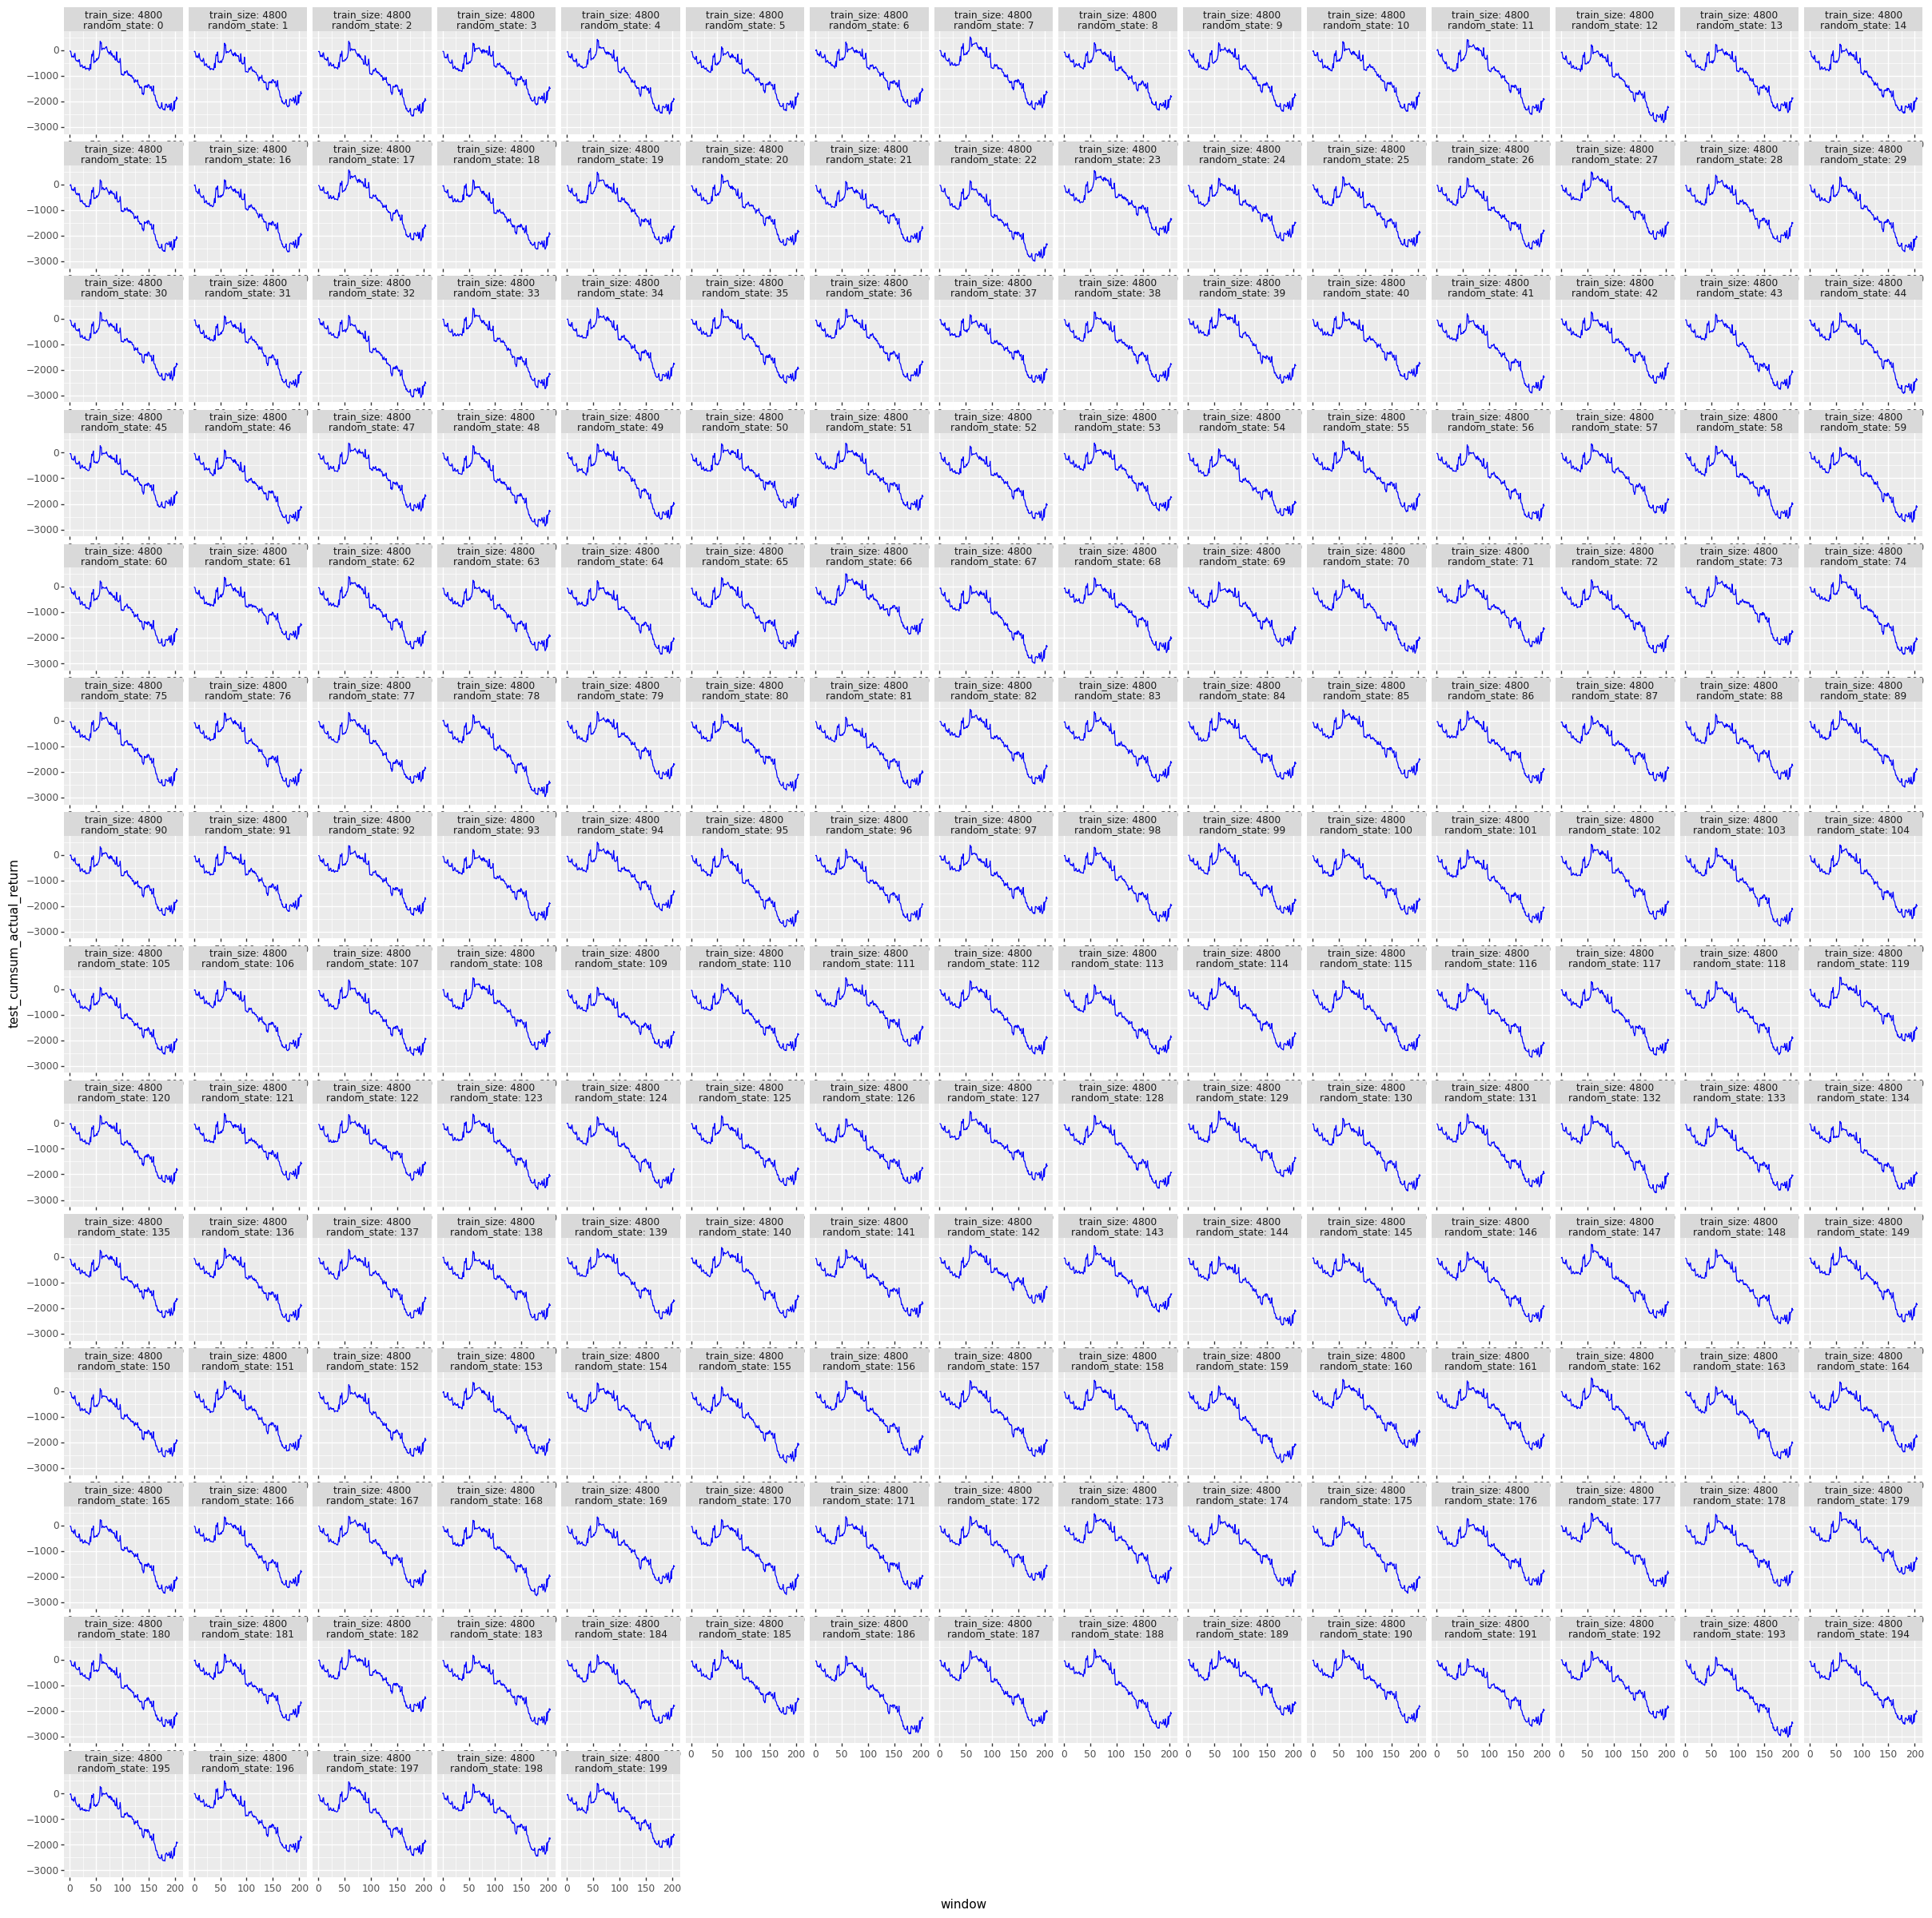

In [5]:
p = ggplot(df)
# p = p + geom_line(aes(x="window", y="train_cumsum_annualized_return"), color="red")
p = p + geom_line(aes(x="window", y="test_cumsum_actual_return"), color="blue")
# p = p + geom_line(aes(x="window", y="test_avg_calmar_ratio"), color="blue")
# p = p + geom_line(aes(x="window", y="val_avg_calmar_ratio"), color="red")
p = p + facet_wrap("~train_size + random_state", scales="free_x", labeller="label_both")
p = p + theme(figure_size=(30, 30))
print(p)

In [ ]:

time = "2024-03-14_19:00"
df = pd.read_csv(f"/projects/genomic-ml/da2343/ml_project_2/kmeans/results/{time}_results.csv")

p = ggplot(df)
p = p + geom_line(aes(x="window", y="test_cumsum_annualized_return"), color="blue")
# p = p + geom_line(aes(x="window", y="val_cumsum_annualized_return"), color="red")
p = p + facet_wrap("~train_size + test_size + random_state", scales="free_x", labeller="label_both")
p = p + theme(axis_text_x=element_text(angle=90), figure_size=(30, 30))
print(p)